# IMDB data set challenge

Cleaning the dataset:
    - Merge the 3 csv files into one dataset
    - Fill empty cells in the revenue column with 0
    - Remove rows that have no rating
    - Remove duplicate rows

Analysing the dataset: 
    - How many films are in the list?
    - What film has the longest runtime?
    - Which director has the most films on this list?
    - How many Horror films are on the list?
    - Plot a histogram of the ratings
    - Plot a histogram of the number of films per year
    - What is the average rating of films directed by Martin Scorcese?
    - Which actor appears in the most films?

# Concatenate DataFrames

In [18]:
import pandas as pd
import glob, os
#movies=pd.concat(pd.read_csv("movie_data_1.csv"),pd.read_csv("movie_data_2.csv"),pd.read_csv("movie_data_3.csv"))
movies=pd.concat(map(pd.read_csv, glob.glob(os.path.join('',"movie_data_*.csv"))))


In [19]:
movies.shape

(1034, 12)

# Cleaning

In [20]:
movies['Revenue (Millions)'].fillna(0,inplace=True)
movies.dropna(subset=['Rating'],inplace=True)
movies.drop_duplicates(subset=['Rank'], inplace=True)

In [21]:
movies.shape

(989, 12)

# Analysis

    - How many films are in the list?
    - What film has the longest runtime?
    - Which director has the most films on this list?
    - How many Horror films are on the list?
    - Plot a histogram of the ratings
    - Plot a histogram of the number of films per year
    - What is the average rating of films directed by Martin Scorcese?
    - Which actor appears in the most films?

In [22]:
movies.shape[0]

989

In [30]:
%%time
movies[movies['Runtime (Minutes)']==max(movies['Runtime (Minutes)'])]

Wall time: 2 ms


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
43,829,Grindhouse,"Action,Horror,Thriller",Quentin Tarantino and Robert Rodriguez's homag...,Robert Rodriguez,"Kurt Russell, Rose McGowan, Danny Trejo, Zo√´ ...",2007,191,7.6,160350,25.03,NaN


In [24]:
movies.Director.value_counts()[movies.Director.value_counts()==max(movies.Director.value_counts())]

Ridley Scott    8
Name: Director, dtype: int64

In [57]:
movies[movies.Genre.str.contains("Horror")].shape[0]
movies[movies.Actors.str.contains("Wa")].shape[0]

118

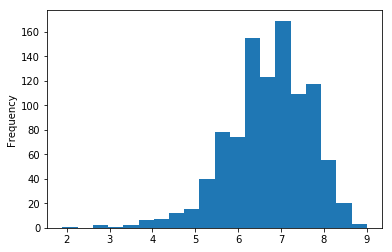

In [52]:
%matplotlib inline
movies.Rating.plot.hist(bins=20)

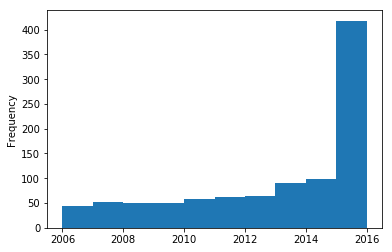

In [53]:
movies.Year.plot.hist()

In [54]:
sum(movies.Rating[movies.Director=="Martin Scorsese"])/len(movies.Rating[movies.Director=="Martin Scorsese"])

7.92

In [50]:
act=movies.Actors.str.split(',',expand=True)
act[0].append([act[1],act[2],act[3]]).str.strip(' ').mode()

0    Mark Wahlberg
dtype: object